<a href="https://colab.research.google.com/github/seasighter/practice_Activity_recognition_using-ANN/blob/Master/Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Activity Recognition  model using CNN

In [ ]:
# to uplaod files
from google.colab import files
files=files.upload()

Saving Akhilesh_Data.csv to Akhilesh_Data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,Input
from tensorflow.keras.models import Model

In [ ]:
data=pd.read_csv("Akhilesh_Data.csv")

In [ ]:
data.head()

,TIMESTAMP,ACCX,ACCY,ACCZ,GCCX,GCCY,GCCZ,PITCH,ROLL,YAW,ANGLEX,ANGLEY,ANGLEZ,ACTIVITY,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,16:17.1,2035,83,20,37,-17,29,-87.60,2.34,2.34,301,241,208,STANDING,NaN,NaN,NaN
1,16:26.6,2036,92,32,-32,9,-32,-87.26,2.59,2.59,301,242,207,STANDING,NaN,NaN,NaN
2,16:26.6,2034,105,29,11,0,29,-86.93,2.95,2.96,301,242,207,STANDING,NaN,NaN,NaN
3,16:26.6,2040,87,31,-4,-10,-31,-87.41,2.44,2.44,301,241,208,STANDING,NaN,NaN,NaN
4,16:26.6,2044,91,20,-10,12,17,-87.39,2.55,2.55,301,241,208,STANDING,NaN,NaN,NaN


In [ ]:
data=data.iloc[:,:-3] # d last three columns
# removing unneccessary columns
#data=data.drop[:,:-3]

In [ ]:
# droping unnecessary columns
data=data.drop("TIMESTAMP",axis=1)# removing timestamp

In [ ]:
data_feature=data.copy()
data_labels=data_feature.pop('ACTIVITY')


In [ ]:
data_feature=np.array(data_feature)
data_feature

array([[ 2035.,    83.,    20., ...,   301.,   241.,   208.],
       [ 2036.,    92.,    32., ...,   301.,   242.,   207.],
       [ 2034.,   105.,    29., ...,   301.,   242.,   207.],
       ...,
       [ 1744.,   -31., -1041., ...,   269.,   205.,   244.],
       [ 1744.,   -31., -1041., ...,   269.,   205.,   244.],
       [ 1669.,    55., -1151., ...,   274.,   203.,   246.]])

In [ ]:
data_feature[0]

array([2035.  ,   83.  ,   20.  ,   37.  ,  -17.  ,   29.  ,  -87.6 ,
          2.34,    2.34,  301.  ,  241.  ,  208.  ])

In [ ]:
data_labels.shape

(4786,)

In [ ]:
label_encoder=LabelEncoder() # Intialize label encoder

In [ ]:
data_labels=label_encoder.fit_transform(data_labels)  # used fit_tranform function to convert label into integer

In [ ]:
n=np.sum(data_labels==1)

m=np.sum(data_labels==0)
n,m

(3873, 913)

In [ ]:
data_feature.shape

(4786, 12)

In [ ]:
# splitting train and test
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(data_feature,data_labels,test_size=0.2,random_state=42)

In [ ]:
x_test.shape

(958, 12)

In [ ]:
y_train.shape

(3828,)

In [ ]:
np.isnan(data_feature).sum()  # No null values

0

In [ ]:
# using ANN Architecture  first
i=Input(shape=(12,))
x=Dense(units=32,activation='relu')(i)
x=Dense(units=64,activation='relu')(x)
x=Dense(units=128,activation='relu')(x)
outputs=Dense(1,activation='sigmoid')(x)  # output layer


In [ ]:
# Create model
model=Model(i,outputs)


In [ ]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
model.summary()# to get parameters knowledge

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10977 (42.88 KB)
Trainable params: 10977 (42.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
120/120 [==============================] - 2s 5ms/step - loss: 2.2380 - accuracy: 0.9404 - val_loss: 0.5146 - val_accuracy: 0.9697
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5266 - accuracy: 0.9621 - val_loss: 0.3319 - val_accuracy: 0.9760
Epoch 3/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.9626 - val_loss: 0.4890 - val_accuracy: 0.9635
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.9673 - val_loss: 0.2251 - val_accuracy: 0.9864
Epoch 5/50
120/120 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.9697 - val_loss: 0.5920 - val_accuracy: 0.9697
Epoch 6/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.9668 - val_loss: 0.6442 - val_accuracy: 0.9603
Epoch 7/50
120/120 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.9681 - val_loss: 0.2668 - val_accuracy: 0.9781
Epoch 

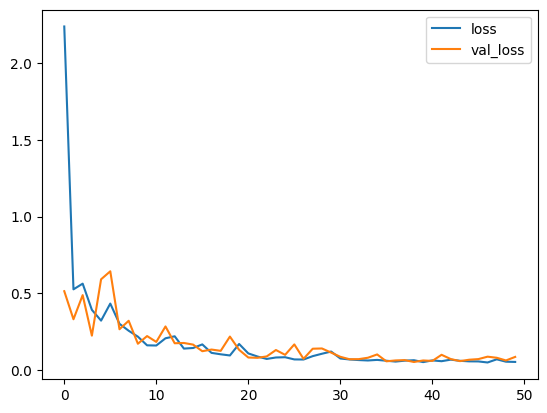

In [ ]:
# plot test and validation  loss graph
import matplotlib.pyplot as plt
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend();

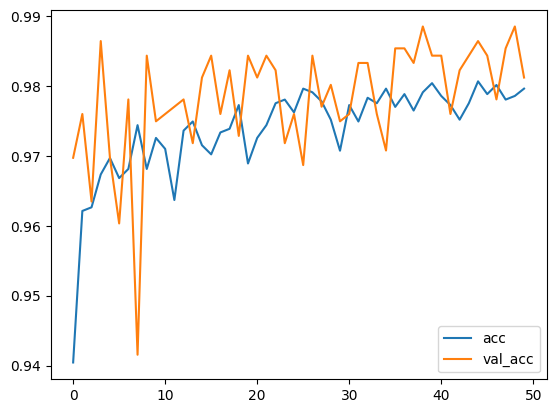

In [ ]:
plt.plot(r.history["accuracy"],label="acc")
plt.plot(r.history["val_accuracy"],label="val_acc")
plt.legend();

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)


30/30 [==============================] - 0s 2ms/step


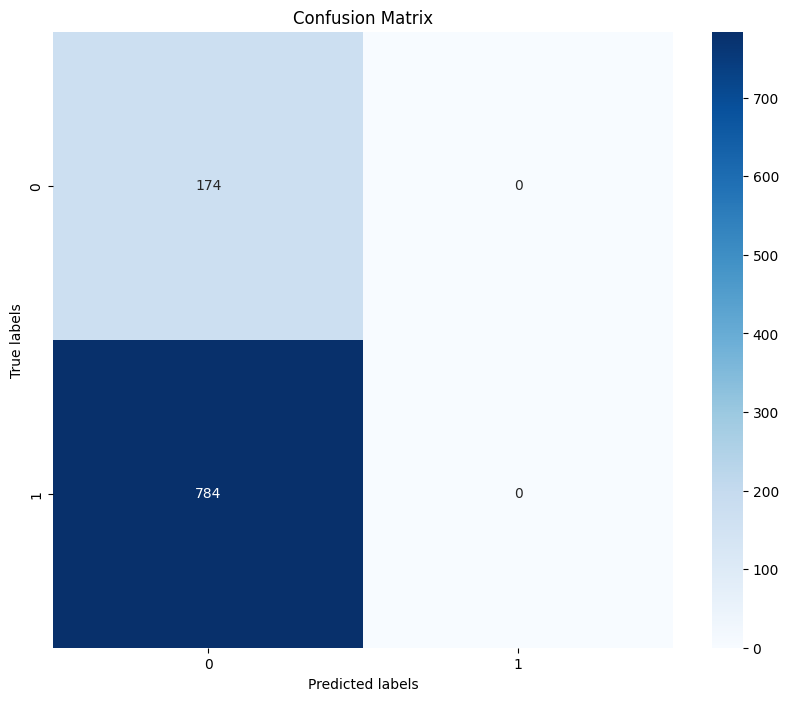

In [ ]:
predicted_labels=np.argmax(predictions,axis=1)
# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["0","1"], yticklabels=["0","1"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# the confusion matrix showing that the labels are imbalanced
cm

array([[174,   0],
       [784,   0]])

In [ ]:
model.save('ANN.keras')


In [ ]:
from keras.models import load_model
loaded_model= load_model('ANN.keras')

In [ ]:
t=x_test[0]
t_new = t.reshape(1,-1) # reshape to make the input in 2 dimension
t_new.shape


(1, 12)

In [ ]:
prediction=loaded_model.predict(t_new)

1/1 [==============================] - 0s 91ms/step


In [ ]:
threshold = 0.5
binary_predictions = (prediction > threshold).astype(int)

print(binary_predictions)

[[1]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0


In [ ]:
model.save('ANN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
